# **Salat Postures Project**

**Project Summary:**

Our project focuses on developing an object detection system tailored specifically for recognizing various salat postures, including **Ruku** (bowing), **Raising**, and **Takbeer** (standing). These postures are fundamental components of the Islamic prayer ritual, and accurately detecting them holds significance for aiding individuals in performing prayers correctly and effectively.

 - Leveraging deep learning algorithms and computer vision methodologies, we train our model on annotated datasets comprising images or videos capturing individuals performing the salat.

The system's architecture incorporates advanced neural network models such as Faster R-CNN, and YOLO (You Only Look Once) V8,


In [ ]:
# Importing the drive module from Google Colab to mount Google Drive (Authorization).
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define a function to visualize images
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

def visualize_photo(input_path, title = None):
    """
    Visualize a photo from the given input path with a shape of 400x400 pixels.

    Parameters:
        input_path (str): The path to the input photo file.
    """
    # Load the photo
    img = Image.open(input_path)

    # Resize the photo to the shape of 640*640 pixels
    img_resized = img.resize((640, 640))

    # Display the photo
    plt.figure(figsize=(8, 6))
    plt.imshow(img_resized)
    plt.axis('off')  # Hide axis
    if title:
        plt.title(title)

    plt.show()

# **Data Preparing**


Preparing data for an object detection model involves several steps:
- **Data Collection**: Gather images or videos containing the objects of interest. These can be sourced from various sources such as online databases, cameras, or other sensors.

- **Annotation**: Mark the location and class of objects within the images or frames. This typically involves bounding box annotations to specify where each object is located and what category it belongs to.

- **Data Augmentation**: Enhance the dataset by applying transformations such as rotation, scaling, flipping, or changing brightness. This increases the diversity of the data and helps the model generalize better.

- **Data Splitting**: Divide the dataset into training, validation, and testing sets. The training set is used to train the model, the validation set is used to tune hyperparameters and prevent overfitting, and the testing set is used to evaluate the model's performance.

- **Data Preprocessing**: Resize images to a consistent size, normalize pixel values, and format the annotations into a suitable input format for the model.


**a- Data gathering and Annotation**

- **Roboflow** is a platform that streamlines the data gathering process by providing tools for data annotation, preprocessing, and management.

- Our dataset is made up of information collected from different places, like the internet and other sources, and with Roboflow we make annotated these images with its asscociated labels [Ruku, Takbeer, and Raising].
- Link Collected from: https://universe.roboflow.com/istaqim/gp-ifuqy
- Link Collected from: https://universe.roboflow.com/hakan-etin-silvm/namaz/

- Collected data for the three classes were **1112 images** [459 Ruku, 479 Raising, 207 Takbeer]
- Final Collected Data Link: https://app.roboflow.com/ifram/salat-postures/3

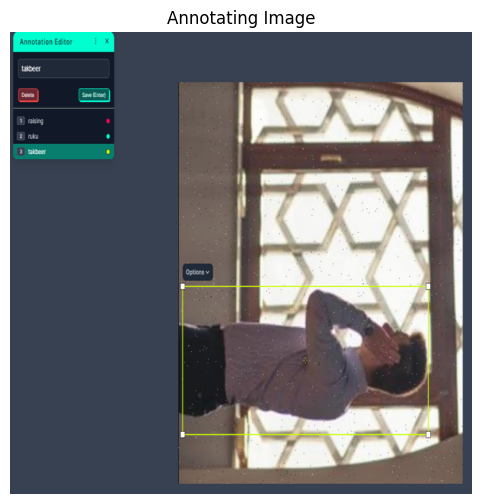

In [ ]:
input_path = "/content/drive/MyDrive/Colab Notebooks/Salat Postures/Visualize Images/ann.png"
visualize_photo(input_path, "Annotating Image")

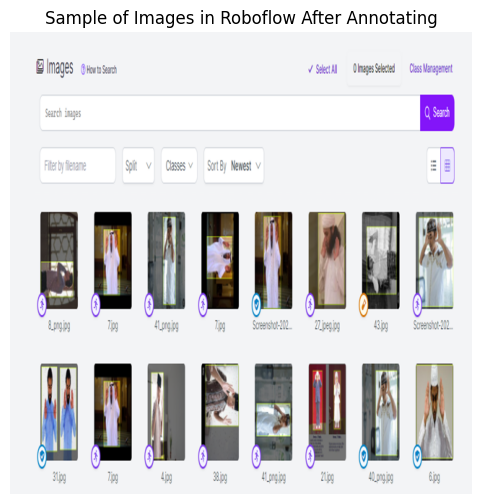

In [ ]:
input_path = "/content/drive/MyDrive/Colab Notebooks/Salat Postures/Visualize Images/salat postures image.png"
visualize_photo(input_path, "Sample of Images in Roboflow After Annotating")

**b- Data Augmentation**: There is a built-in library in keras used to help you with data augmentation process and process images which is **ImageDataGenerator**, but we are going to use a simpler method with the aid of Roboflow.


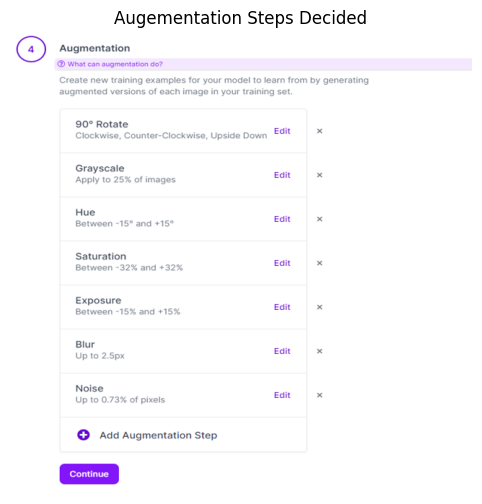

In [ ]:
input_path = "/content/drive/MyDrive/Colab Notebooks/Salat Postures/Visualize Images/augmentation.png"
visualize_photo(input_path, "Augementation Steps Decided")

- For **Grayscale step**, this step is different from working with RGB or Grayscale, here we are making the model more general to predict any image in every situation with the inputted image is colored, noisy, black and white, blured, exposured, or staurated.

**c- Data Splitting**: This is a very critical Steps to decide, Train and Validation set are the most important sets as they are related to getting weights of model, hence they got the most ratio with 89% Train, 7% Validation, 3% Test.

- After Augmenting Data we got 2722 Images [2415 Train, 204 Validation, 103 Test]

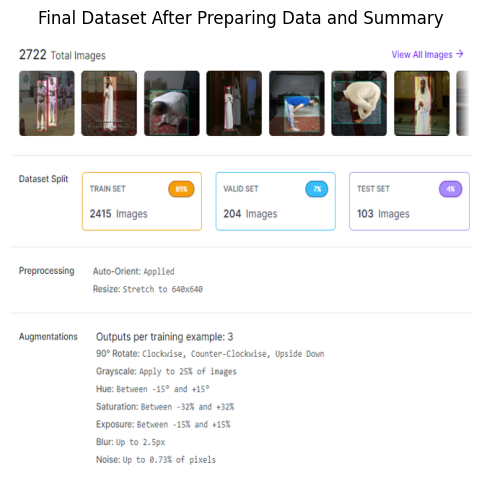

In [ ]:
input_path = "/content/drive/MyDrive/Colab Notebooks/Salat Postures/Visualize Images/Final Images.png"
visualize_photo(input_path, "Final Dataset After Preparing Data and Summary")

# **Import necessary libraries**

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/Salat Postures"

/content/drive/MyDrive/Colab Notebooks/Salat Postures


In [ ]:
# This line installs the Ultralytics library using pip, allowing access to its features for tasks related to computer vision, such as object detection and image classification

In [ ]:
pip install ultralytics

In [ ]:
# Import YOLO object detection model from Ultralytics and OpenCV for image processing.

from ultralytics import YOLO # YOLO object detection model
import cv2 # OpenCV for image processing
from google.colab.patches import cv2_imshow # Patched version of cv2_imshow for displaying images in Google Colab
import matplotlib.pyplot as plt
import os
import random
from matplotlib.patches import Rectangle

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# **Visualizing Sample of The Training Dataset**

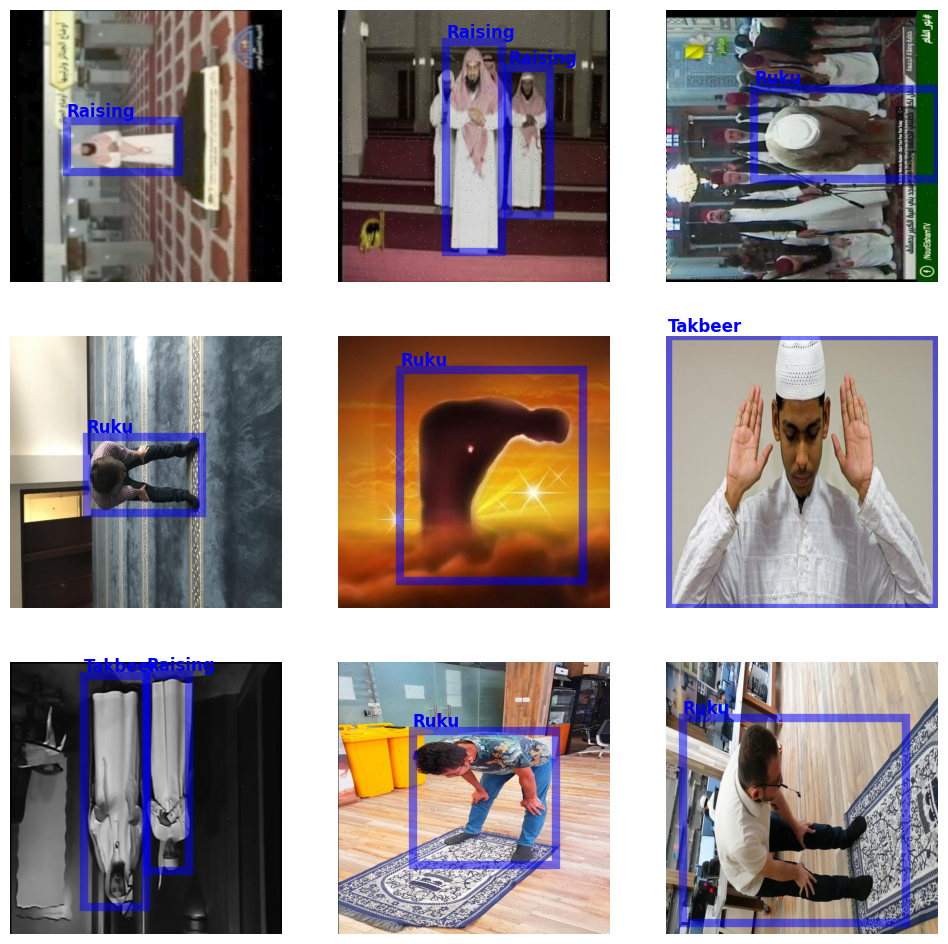

In [ ]:

# Define the class labels
class_labels = {
    0: "Raising",
    1: "Ruku",
    2: "Takbeer"
}

# Path to the directory containing training images and annotations
data_dir = "/content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/train"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(os.path.join(data_dir, "images")) if f.endswith(".jpg")]

# Randomly select 9 images
sample_images = random.sample(image_files, 9)

# Plotting the sample images
plt.figure(figsize=(12, 12))
for i, image_file in enumerate(sample_images):
    # Load the image
    image_path = os.path.join(data_dir, "images", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load corresponding annotation file
    annotation_file = os.path.splitext(image_file)[0] + ".txt"
    annotation_path = os.path.join(data_dir, "labels", annotation_file)
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # Plot the image with bounding boxes
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert normalized coordinates to absolute coordinates
        width *= image.shape[1]
        height *= image.shape[0]
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        # Calculate bounding box coordinates
        x1 = x_center - width/2
        y1 = y_center - height/2
        # Create a rectangle patch with adjusted transparency
        rect = Rectangle((x1, y1), width, height, linewidth=6, edgecolor='b', facecolor='none', alpha=0.5)
        # Add the patch to the current axis
        plt.gca().add_patch(rect)
        # Get the label corresponding to the class ID
        label = class_labels[int(class_id)]
        # Add label with increased font size
        plt.text(x1, y1 - 10, label, fontsize=12, color='b', weight='bold')
    plt.axis('off')

plt.show()


# **Object Detection Model Selection**


In this step we are going to choose a suitable pre-trained model architecture that supports both object detection and pose estimation. Models like Mask R-CNN, Faster R-CNN, or YOLO (You Only Look Once) can be adapted for this purpose.

- for object detection part we used two model to choose between whic are **YOLO v8, and Faster R-CNN**, and move on with one of them, these model are going to localize the location of the prayer either it's raising, ruku, or takbeer.

- According to accuracy and time, we are going to move on with YOLO v8 model, then use **mediaPipe model (library)** for pose estimation to be able to judge is that a right prayer pose or not based on angles and distances from perfect pose and indicate deviation error.

##  **YOLO v8 Model**
YOLO is an object detection algorithm that approaches object detection as a single regression problem, directly predicting bounding boxes and class probabilities from full images.
The key idea behind YOLO is to divide the input image into an S × S grid and each grid cell is responsible for predicting bounding boxes and their corresponding class probabilities.

Train the YOLOv8 model with the specified data and hyperparameters:
- **Data**: "/content/drive/MyDrive/Colab Notebooks/SalatPostures/Salat Postures.v1i.yolov8/data.yaml"
- **Number of epochs**: 65 (Number of times the entire dataset will be passed forward and backward through the neural network during training)
- **Initial learning rate** (lr0): 0.1 (Starting learning rate for the optimizer)
- **Final learning rate** (lrf): 0.0001 (Final learning rate for the optimizer after cosine learning rate scheduling)
- **Cosine learning rate scheduling** (cos_lr): True (Flag indicating whether to use cosine learning rate scheduling, which gradually decreases the learning rate over epochs to prevent overshooting)

---



During the training process, the following actions were taken:

- **Scanning Train Data**: The training data directory was scanned for image labels. In this case, 246 images were found for training, with no background images or corrupt data.

- **Data Augmentation**: Various augmentation techniques were applied to the training data, including blur, median blur, grayscale conversion, and CLAHE (Contrast Limited Adaptive Histogram Equalization). These augmentations help in increasing the diversity of the training data and improving the model's robustness.

- **Scanning Validation Data**: Similar to the training data, the validation data directory was scanned for image labels. In this case, 23 images were found, with no background images or corrupt data.

- **Optimizer Selection**:  AdamW optimizer with a learning rate of 0.001667 and momentum of 0.9 was selected.

Overall, these steps are part of the setup and initialization process before training the YOLOv5 model, ensuring that the data is properly prepared and the optimizer is appropriately configured.

In [ ]:
# Use the model
model.train(data="/content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/data.yaml", epochs=80, lr0 = 0.1, lrf = 0.001, cos_lr = True, plots = True, dropout = 0.0, optimizer = 'auto', batch = 64) # train the model

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/data.yaml, epochs=80, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/train/labels... 2415 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2415/2415 [09:54<00:00,  4.06it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/valid/labels... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:50<00:00,  4.04it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      14.7G      1.291      2.362      1.583        115        640: 100%|██████████| 38/38 [01:03<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]

                   all        203        231      0.607      0.639      0.666      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      14.6G      1.345       1.64      1.566        142        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        203        231       0.64      0.208      0.192     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      14.6G      1.469      1.779      1.667        123        640: 100%|██████████| 38/38 [01:01<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        203        231      0.146      0.148     0.0496     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      14.4G       1.51      1.802       1.68        132        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all        203        231      0.111      0.192     0.0404     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      14.4G      1.482      1.743      1.653        118        640: 100%|██████████| 38/38 [01:02<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        203        231      0.499      0.329      0.285      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      14.6G      1.401      1.584      1.581        118        640: 100%|██████████| 38/38 [01:01<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        203        231      0.641      0.522      0.574      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      14.4G      1.349      1.477      1.548        126        640: 100%|██████████| 38/38 [01:03<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        203        231       0.76       0.61      0.701      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      14.4G        1.3      1.395      1.518        139        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        203        231      0.742      0.635      0.679      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      14.4G      1.276      1.295       1.49        128        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        203        231      0.774      0.641      0.716      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      14.5G      1.243       1.28      1.474        139        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        203        231      0.733      0.696      0.779      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      14.4G      1.215      1.222      1.459        139        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        203        231       0.82      0.629      0.779      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      14.4G      1.214      1.182      1.445        145        640: 100%|██████████| 38/38 [01:05<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        203        231      0.788       0.72      0.796      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      14.4G      1.171      1.182      1.425        122        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        203        231       0.73      0.746      0.792      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      14.5G      1.164      1.121      1.408        120        640: 100%|██████████| 38/38 [00:58<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        203        231      0.829      0.717      0.801      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      14.6G      1.143        1.1      1.403        133        640: 100%|██████████| 38/38 [00:59<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        203        231      0.861      0.751       0.85       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      14.5G      1.145      1.079      1.395        135        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        203        231      0.846      0.782      0.889      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      14.5G      1.105      1.035      1.365        111        640: 100%|██████████| 38/38 [00:59<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

                   all        203        231       0.84      0.831      0.899      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      14.3G      1.094     0.9878       1.36        122        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        203        231      0.874      0.786      0.893      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      14.4G      1.083     0.9821       1.36        131        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        203        231      0.857      0.823      0.895      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      14.6G      1.058      0.947      1.336        144        640: 100%|██████████| 38/38 [00:59<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        203        231      0.787      0.817      0.868       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      14.4G      1.067     0.9371      1.341        131        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        203        231      0.846      0.827      0.894      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      14.5G      1.061     0.9321      1.334        118        640: 100%|██████████| 38/38 [00:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all        203        231      0.919      0.823      0.924      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      14.5G      1.062     0.9255      1.333        119        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        203        231       0.86      0.776      0.876      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      15.5G      1.046     0.9063      1.327        123        640: 100%|██████████| 38/38 [00:59<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all        203        231      0.862      0.795      0.909      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      14.5G      1.004     0.8623      1.297        128        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]

                   all        203        231      0.879      0.851      0.925      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      14.6G      1.024     0.8854      1.309        119        640: 100%|██████████| 38/38 [00:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all        203        231      0.906      0.844      0.925      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      14.4G      1.003     0.8497      1.289        107        640: 100%|██████████| 38/38 [00:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all        203        231      0.891      0.858      0.931      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      15.5G      0.971     0.8176      1.268        143        640: 100%|██████████| 38/38 [00:59<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all        203        231       0.88      0.873      0.935        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      14.4G     0.9662     0.7913       1.27        121        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        203        231      0.932      0.814      0.931      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      14.6G     0.9567     0.7916      1.254        113        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        203        231      0.962      0.799      0.931      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      14.4G     0.9618     0.7832      1.261        111        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        203        231      0.867      0.892      0.941      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      14.4G     0.9483     0.7717      1.262        113        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        203        231       0.93      0.887      0.938      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      14.4G     0.9425     0.7616      1.249        105        640: 100%|██████████| 38/38 [01:01<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        203        231      0.921      0.828      0.915      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      14.4G     0.9315     0.7404      1.253        122        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        203        231      0.936      0.864      0.922      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      14.5G     0.9057      0.717       1.23        117        640: 100%|██████████| 38/38 [01:01<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all        203        231      0.894      0.906      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      14.5G     0.9191     0.7374      1.235        110        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        203        231      0.901      0.876       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      14.4G     0.9056     0.7105      1.226        104        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        203        231      0.889      0.873      0.946      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      14.4G      0.881      0.685      1.216        121        640: 100%|██████████| 38/38 [01:03<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        203        231      0.945      0.835      0.948      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      14.5G     0.9004     0.6989       1.22         97        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all        203        231      0.956      0.858       0.94      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      14.4G      0.866     0.6814      1.201        127        640: 100%|██████████| 38/38 [01:01<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        203        231      0.918      0.876      0.945      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      14.6G     0.8774     0.6663      1.213        130        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all        203        231      0.901       0.91      0.957      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      14.6G     0.8739     0.6722      1.214        128        640: 100%|██████████| 38/38 [00:59<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all        203        231      0.942      0.886       0.96      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      14.4G     0.8605     0.6597      1.199        116        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all        203        231      0.955      0.869       0.95      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      14.4G     0.8453     0.6349      1.186        153        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        203        231      0.885        0.9      0.947      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      14.5G     0.8425     0.6455      1.189        120        640: 100%|██████████| 38/38 [01:02<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        203        231      0.904      0.909      0.951      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      14.6G     0.8314     0.6162       1.18        141        640: 100%|██████████| 38/38 [01:02<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        203        231      0.959      0.876      0.954      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      14.5G     0.8059     0.5969      1.165        133        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all        203        231      0.971      0.881      0.951      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      14.5G     0.8289     0.6009      1.171        126        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        203        231      0.969      0.865      0.943      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      14.4G     0.7887     0.5851      1.152        146        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        203        231      0.975      0.856      0.951      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      14.4G     0.8066     0.5912      1.168        112        640: 100%|██████████| 38/38 [01:01<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        203        231      0.915       0.91      0.947      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      14.5G     0.7883     0.5688      1.161        121        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        203        231      0.943      0.889       0.95      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      14.4G     0.7715     0.5753      1.151        112        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all        203        231      0.953      0.877      0.955      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      14.4G     0.7914     0.5748      1.155        128        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all        203        231      0.951      0.883      0.958      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      14.4G     0.7609     0.5597      1.138        126        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        203        231      0.947      0.888      0.951      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      14.5G     0.7436     0.5372      1.128        112        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        203        231       0.92      0.902      0.953      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      14.4G     0.7438     0.5462      1.137        121        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

                   all        203        231      0.963       0.88      0.949      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      14.5G      0.748     0.5322      1.132        142        640: 100%|██████████| 38/38 [01:00<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all        203        231      0.917       0.91      0.952      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      14.4G     0.7383     0.5226      1.122        140        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all        203        231      0.942      0.874      0.946      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      14.6G     0.7285     0.5215      1.118        128        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all        203        231      0.947      0.881      0.947      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      14.4G     0.7398     0.5195      1.129        107        640: 100%|██████████| 38/38 [01:00<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all        203        231      0.914       0.91       0.95      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      15.5G     0.7272     0.5132      1.118        119        640: 100%|██████████| 38/38 [01:02<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        203        231      0.954      0.894      0.949      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      14.4G     0.7042      0.501      1.107        126        640: 100%|██████████| 38/38 [01:02<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        203        231      0.936      0.918      0.961      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      14.4G     0.7032     0.4916      1.109        120        640: 100%|██████████| 38/38 [01:03<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        203        231      0.959       0.88      0.955      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      14.6G     0.6991     0.4928      1.101        119        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        203        231      0.955      0.899      0.954      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      14.4G     0.6909     0.4804      1.101        155        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        203        231      0.925       0.91      0.955      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      14.4G     0.6785     0.4736      1.096        129        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        203        231      0.951      0.879      0.957      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      14.4G     0.6764      0.465      1.091        132        640: 100%|██████████| 38/38 [01:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        203        231      0.958      0.891      0.959      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      14.5G     0.6838     0.4707      1.096        118        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        203        231      0.934      0.887      0.958      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      14.5G     0.6684     0.4644      1.092        130        640: 100%|██████████| 38/38 [01:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        203        231      0.941      0.885      0.954      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      14.6G     0.6878     0.4712      1.098        130        640: 100%|██████████| 38/38 [01:00<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all        203        231      0.958      0.894      0.956      0.784


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      13.7G     0.5887     0.3631      1.068         50        640: 100%|██████████| 38/38 [01:04<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        203        231      0.939      0.899      0.953      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      14.4G     0.5768     0.3318      1.056         49        640: 100%|██████████| 38/38 [00:57<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]

                   all        203        231      0.931      0.917      0.959      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      14.4G     0.5682     0.3316      1.054         64        640: 100%|██████████| 38/38 [00:57<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        203        231      0.965       0.89      0.959      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      14.4G     0.5619      0.325      1.049         60        640: 100%|██████████| 38/38 [00:58<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all        203        231      0.962      0.886       0.96      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      14.4G     0.5539     0.3193      1.042         75        640: 100%|██████████| 38/38 [00:58<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        203        231      0.969      0.895      0.964      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      14.4G     0.5511     0.3194      1.042         63        640: 100%|██████████| 38/38 [00:57<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all        203        231      0.953        0.9      0.958      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      14.4G     0.5479     0.3146      1.046         63        640: 100%|██████████| 38/38 [00:59<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all        203        231       0.95      0.902      0.957      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      14.4G     0.5466     0.3127      1.045         57        640: 100%|██████████| 38/38 [00:56<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        203        231       0.96      0.882      0.956      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      14.4G     0.5513     0.3122      1.039         52        640: 100%|██████████| 38/38 [00:57<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        203        231      0.942      0.896      0.956      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      14.4G     0.5504     0.3141      1.048         52        640: 100%|██████████| 38/38 [00:56<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all        203        231      0.953      0.904      0.959      0.788



80 epochs completed in 1.506 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


                   all        203        231      0.962      0.886       0.96      0.787
               raising        203         92      0.946      0.935      0.963      0.779
                  ruku        203         92      0.963      0.848      0.953      0.726
               takbeer        203         47      0.976      0.876      0.964      0.857
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eee5e4e5c60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Salat Postures/best.pt')

In [ ]:
model.val(data="/content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/data.yaml")

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 119MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/SalatPostures/SalatPostures2722Images/valid/labels.cache... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


                   all        203        231      0.968      0.885       0.96      0.787
               raising        203         92      0.963      0.935      0.963       0.78
                  ruku        203         92      0.967      0.848      0.953      0.727
               takbeer        203         47      0.976      0.872      0.963      0.856
Speed: 2.7ms preprocess, 9.8ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf0d5a158d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/SalatPostures/runs/detect/train4/weights/best.pt')

## **Faster R-CNN Model**

**Faster R-CNN** (Region-based Convolutional Neural Network) represents a significant advancement in the field of object detection within computer vision. Developed to address the limitations of earlier approaches, Faster R-CNN offers both accuracy and speed, making it a cornerstone in various real-world applications.

At its core, Faster R-CNN is built on the idea of dividing the object detection process into two main stages: region proposal and object classification. This modular approach allows for efficient computation and improved performance.

* In the first stage, Faster R-CNN utilizes a Region Proposal Network (RPN) to generate potential bounding boxes (regions of interest) within an image. These candidate regions are then refined and filtered based on their likelihood of containing objects, enabling precise localization.

* Following the region proposal stage, the selected regions are fed into a classifier for object detection and classification. Through a combination of feature extraction and classification layers, Faster R-CNN accurately identifies objects within the proposed regions, assigning them to predefined categories.

In summary, Faster R-CNN stands as a versatile and efficient solution for object detection tasks, offering a balance between accuracy and speed. Its modular architecture and shared feature extraction make it an invaluable tool for a wide range of applications, from autonomous vehicles to surveillance systems and beyond.

In [ ]:
model.val(data="/content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/data.yaml")

NameError: name 'model' is not defined

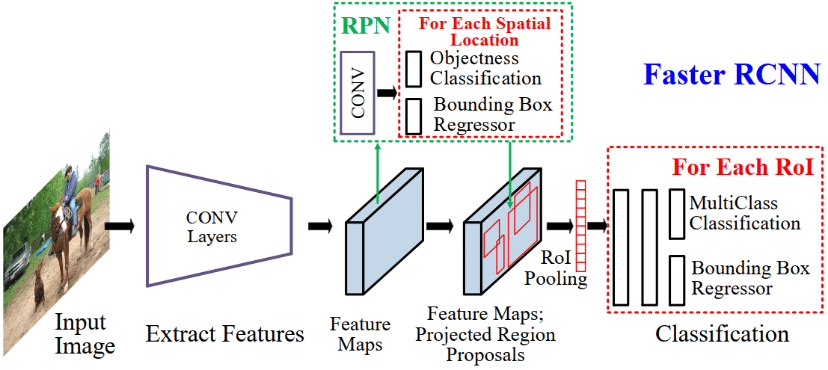


Step 1: **Prepare Your Custom Dataset**

The first step in training a Faster R-CNN model is to prepare your custom dataset. This involves organizing your data into a format compatible with PyTorch's Dataset class. Whether you're working with images of traffic signs, animals, or any other objects, ensuring a well-structured dataset is crucial for successful training.

Step 2: **Choose a Backbone**

Faster R-CNN relies on a backbone network to extract features from input images. You have the flexibility to choose from a variety of backbones, including popular architectures like ResNet, VGG, or even custom models tailored to your specific needs. These backbones serve as the foundation for accurate object detection.

Step 3: **Define the Faster R-CNN Model**

Building upon the chosen backbone, the Faster R-CNN model integrates components such as the Region Proposal Network (RPN) and the Region of Interest (RoI) pooling layers. By combining these elements, Faster R-CNN effectively identifies regions in images likely to contain objects and refines their spatial boundaries.

Step 4: **Set up Data Loading and Augmentation**

To facilitate efficient training, you'll employ PyTorch's data loading utilities to feed batches of data into the model. Additionally, data augmentation techniques such as cropping, flipping, and resizing help diversify the dataset, enhancing the model's ability to generalize to unseen data.

Step 5: **Define Loss Function and Optimizer**

### **Cloning Faster R-CNN Model**

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Salat Postures/Faster R-CNN/'

In [ ]:
#Clone Faster R-CNN model on Custom Dataset [Once]
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

In [ ]:
# Locate Current Location of Work
%cd '/content/drive/MyDrive/Colab Notebooks/Salat Postures/Faster R-CNN/fastercnn-pytorch-training-pipeline/'

In [ ]:
# Install Libraries from Test file
!pip install -r requirements.txt


In [ ]:
%%writefile data_configs/SalatPosturesPascalVoc2722.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'Salat Postures2722imagesVoc/train'
TRAIN_DIR_LABELS: 'Salat Postures2722imagesVoc/train'
VALID_DIR_IMAGES: 'Salat Postures2722imagesVoc/valid'
VALID_DIR_LABELS: 'Salat Postures2722imagesVoc/valid'

# Class names.
CLASSES: [
    '__background__',
    'raising', 'ruku', 'takbeer'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 4

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

### **Model Training**

- Resnet50 v2 Archecticture was selected for training

In [ ]:
!python train.py --data data_configs/SalatPosturesPascalVoc2722.yaml --epochs 12 --model fasterrcnn_resnet50_fpn_v2 --name HunderedEpochs2722ImagesThreeClasses --batch 16

2024-03-01 12:35:13.784559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 12:35:13.784621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 12:35:13.786064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 12:35:15.060168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb 

# **Pose Estimation Integration with Object Detection Model**



- After Choosing Yolo v8 for its perforance to localize prayer in inputted image we estimate the points of every important part in body for each praying pose, for example: in Ruku pose we are interested in knee, hip, and shoulder, an so on.

- **MediaPipe** is a popular open-source framework developed by Google that provides easy-to-use, cross-platform tools for building machine learning pipelines, including various tasks such as object detection, pose estimation, hand tracking, and more.

In [ ]:
# Define Urls for number of images on internet to test model with
ruku_image_urls = [  "/content/drive/MyDrive/Ruku Images/ruku-1.jpg",
                    "/content/drive/MyDrive/Ruku Images/ruku-3.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-4.jpg",
                     "/content/drive/MyDrive/Ruku Images/ruku-5.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-6.jpg", ]

In [ ]:
# Define Urls for number of images on internet to test model with
takbeer_image_urls = [ "/content/drive/MyDrive/Takbeer Images/takbeer-1.jpg",
                   "/content/drive/MyDrive/Takbeer Images/takbeer-2.jpg",
                    "/content/drive/MyDrive/Takbeer Images/takbeer-3.jpg", ]

## **1- Ruku Pose**

Here's how you can implement this condition using MediaPipe for pose estimation:

**Pose Estimation Setup**:

Follow the installation and setup steps mentioned earlier to install MediaPipe and set up the pose estimation model.

**Detection and Calculation:**

After obtaining the pose landmarks from MediaPipe, identify the landmarks corresponding to the hip, knee, and shoulder joints.
Calculate the vectors representing line 1 (hip to knee) and line 2 (hip to shoulder).
Compute the angle between these two vectors using vector mathematics or trigonometric functions.

**Angle Threshold Check:**

Compare the calculated angle with the specified range **(85 to 95 degrees)** to determine if the pose satisfies the Ruku pose condition.
If the angle falls within the range, consider it a valid Ruku pose.
If the angle deviates beyond the specified range, flag it as a deviation or error in the pose estimation.

**Visualization and Feedback:**

Visualize the pose landmarks and lines on the image or video frame.
Provide visual feedback to the user indicating whether the detected pose meets the Ruku pose criteria or not. This could be through text overlays, color-coded indicators, or other visual cues.

In [ ]:
!pip install -q mediapipe

In [ ]:
# Load YOLO v8 Best Model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/runs/detect/train8/weights/best.pt')


image 1/1 /content/drive/MyDrive/Ruku Images/ruku-4.jpg: 640x448 1 ruku, 186.9ms
Speed: 16.9ms preprocess, 186.9ms inference, 2321.9ms postprocess per image at shape (1, 3, 640, 448)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8715])
data: tensor([[2.2873e+02, 4.5149e+02, 8.3478e+02, 1.2001e+03, 8.7154e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (1280, 891)
shape: torch.Size([1, 6])
xywh: tensor([[531.7540, 825.8010, 606.0433, 748.6187]])
xywhn: tensor([[0.5968, 0.6452, 0.6802, 0.5849]])
xyxy: tensor([[ 228.7323,  451.4917,  834.7756, 1200.1104]])
xyxyn: tensor([[0.2567, 0.3527, 0.9369, 0.9376]])
Bounding box coordinates (x1, y1, x2, y2): 228.7322998046875 451.49169921875 834.775634765625 1200.1103515625
6.451572771886077
12.0462803389252
Ruku pose detected with an error of 1.45%.


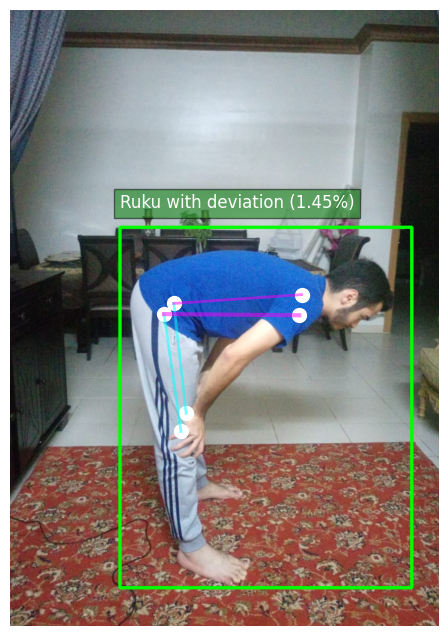

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad1 = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad1 = angle_rad1 % (2 * math.pi)
    angle_rad2 = math.atan2(a[1]-b[1], a[0]-b[0]) - math.atan2(c[1]-b[1], c[0]-b[0])
    angle_rad2 = angle_rad2 % (2 * math.pi)
    return math.degrees(min(angle_rad1, angle_rad2))

# Function to check if the pose resembles the ruku position in Salat
def is_ruku_pose(landmarks):
    # Get relevant landmarks (e.g., shoulders, hips)
    left_hip = (landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y)
    right_hip = (landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y)
    left_shoulder = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)
    right_shoulder = (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
    left_knee = (landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y)
    right_knee = (landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y)

    # Calculate angles between lines formed by hip to shoulder and hip to knee
    angle_left = abs(90 - calculate_angle(left_knee, left_hip, left_shoulder))
    angle_right = abs(90 - calculate_angle(right_knee, right_hip, right_shoulder))
    print(angle_left)
    print(angle_right)
    # Define condition for ruku pose (e.g., angles within a range around 90 degrees)
    ruku_angle_threshold = 30  # Adjust as needed
    if angle_left <= ruku_angle_threshold or angle_right <= ruku_angle_threshold:
        return True, min(abs(angle_left), abs(angle_right)) / 100 * 100  # Calculate error percentage
    else:
        return False, 0

# Function to process image and detect ruku pose
def process_image(image_path):
    # Load Model
    results = model.predict(image_path)

    for r in results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    x1, y1, x2, y2 = bounding_box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    Perfect_Threshold = 5;
    if results.pose_landmarks:
        # Check if pose resembles ruku pose
        is_ruku, error_percentage = is_ruku_pose(results.pose_landmarks.landmark)
        if is_ruku and error_percentage > Perfect_Threshold:
            print("Ruku pose detected with an error of {:.2f}%.".format(error_percentage-Perfect_Threshold))
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            if error_percentage <= 15:
                bg_color = 'green'
            else:
                bg_color = 'red'
            plt.text(x1, y1 - 40, "Ruku with deviation ({:.2f}%)".format(error_percentage-Perfect_Threshold), color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku and error_percentage <= Perfect_Threshold:
            print("Perfect Ruku pose detected")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            bg_color = 'green'
            plt.text(x1, y1 - 40, "Ruku with no deviation", color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku is False:
            print("Ruku pose not detected.")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines connecting hip to shoulder and hip to knee
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)

            # Add text indicating not ruku in the top of the image
            plt.text(x1, y1 - 40, "Not Ruku Pose", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            plt.axis('off')
            plt.show()
    else:
        print("No pose detected in the image.")


# Example usage:
process_image(ruku_image_urls[2])

## **2- Takbeer Pose Estimation:**

**Condition 1: Wrist Alignment:**

Calculate the distance between the left and right wrists.
Ensure that the distance between the left and right wrists does not exceed 0.05 units, indicating that they are approximately at the same level horizontally.
Condition

 **2: Standing Position:**

Calculate the distance between the hip and shoulder joints, representing the height of the person.
Ensure that the distance between the hip and shoulder joints is greater than 0.3 units, indicating that the person is in a standing position.


image 1/1 /content/drive/MyDrive/Takbeer Images/takbeer-1.jpg: 448x640 1 takbeer, 149.5ms
Speed: 2.5ms preprocess, 149.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.9244])
data: tensor([[103.7088,   0.0000, 472.0856, 359.3886,   0.9244,   2.0000]])
id: None
is_track: False
orig_shape: (360, 540)
shape: torch.Size([1, 6])
xywh: tensor([[287.8972, 179.6943, 368.3768, 359.3886]])
xywhn: tensor([[0.5331, 0.4992, 0.6822, 0.9983]])
xyxy: tensor([[103.7088,   0.0000, 472.0856, 359.3886]])
xyxyn: tensor([[0.1921, 0.0000, 0.8742, 0.9983]])
Bounding box coordinates (x1, y1, x2, y2): 103.70877838134766 0.0 472.0856018066406 359.3886413574219
-0.0037203431129455566
0.5027993619441986


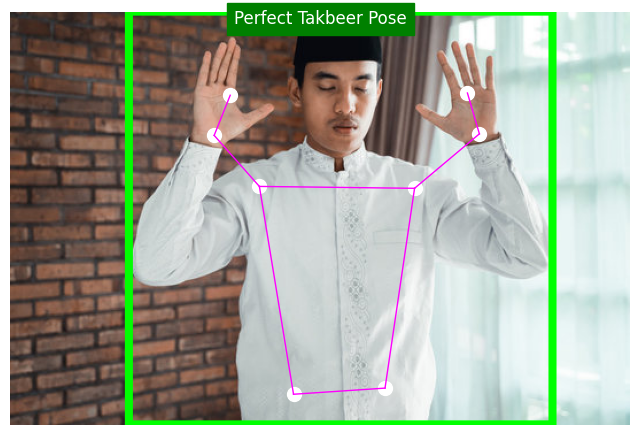

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad = angle_rad % (2 * math.pi)
    return math.degrees(angle_rad)

# Function to check if the pose resembles the Takbeer position in Salat
def is_takbeer_pose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_index = landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value]
    right_index = landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value]
    print(left_wrist.y - right_wrist.y)
    print(right_hip.y - right_shoulder.y)

    Perfect_Threshold = 5;
    # Check if left and right wrist are on the same line
    if abs(left_wrist.y - right_wrist.y) < 0.05 and abs(left_wrist.x - right_wrist.x) > 0.15:
        # Check if distance between right hip and right shoulder in y-direction is big enough
        if right_hip.y - right_shoulder.y > 0.25 or left_hip.y - left_shoulder.y > 0.25 :
            # Check if wrists are above the shoulders
            if left_wrist.y < left_shoulder.y and right_wrist.y < right_shoulder.y:
                # Check if index fingers are above the shoulders
                if left_index.y < left_shoulder.y and right_index.y < right_shoulder.y:
                    return True, abs(abs(left_wrist.y)-abs(right_wrist.y)) / 0.5 * 100
    return False, 0

# Function to process image and detect Takbeer pose
def process_image(image_path):

    model_results = model.predict(image_path)

    for r in model_results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    Perfect_Threshold = 5;
    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:

        # Draw bounding box
        x1, y1, x2, y2 = bounding_box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)
        # Check if pose resembles Takbeer pose

        is_takbeer, error = is_takbeer_pose(results.pose_landmarks.landmark)
        if is_takbeer and error > Perfect_Threshold:
            text = "Takbeer with deviation ({:.2f}%)".format(error-Perfect_Threshold)
            text_color = 'white'
            bg_color = 'green'

        if is_takbeer and error <= Perfect_Threshold:
            text = "Perfect Takbeer Pose"
            text_color = 'white'
            bg_color = 'green'
        if is_takbeer is False:
            text = "Takbeer pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text(image.shape[1] / 2, 10, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [(mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_WRIST),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_WRIST),
                       (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
                       (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)]

        # Draw points for knees, hips, and shoulders
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)
        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
process_image(takbeer_image_urls[0])


## **3- Raising Pose Estimation:**

**Condition 1: Wrist Alignment:**

the distance between right wrist and left wrist is very small as the are on each other approximately.

 **2: Standing Position:**

Calculate the distance between the hip and shoulder joints, representing the height of the person.
Ensure that the distance between the hip and shoulder joints is greater than 0.3 units, indicating that the person is in a standing position.


image 1/1 /content/drive/MyDrive/Raising Images/raising-1.jpg: 448x640 1 raising, 142.4ms
Speed: 3.8ms preprocess, 142.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8947])
data: tensor([[1.5350e+03, 4.3792e+02, 3.4065e+03, 3.2640e+03, 8.9468e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (3264, 4928)
shape: torch.Size([1, 6])
xywh: tensor([[2470.7817, 1850.9607, 1871.5361, 2826.0786]])
xywhn: tensor([[0.5014, 0.5671, 0.3798, 0.8658]])
xyxy: tensor([[1535.0137,  437.9215, 3406.5498, 3264.0000]])
xyxyn: tensor([[0.3115, 0.1342, 0.6913, 1.0000]])
Bounding box coordinates (x1, y1, x2, y2): 1535.013671875 437.9215087890625 3406.5498046875 3264.0
4.744991779327393


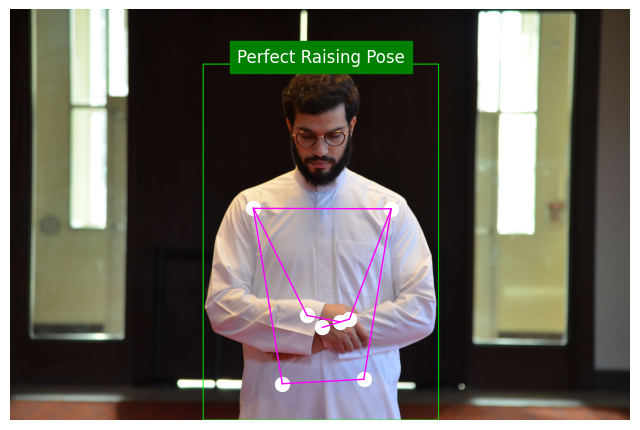

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def is_raising_pose(landmarks):
    # Extract relevant landmarks
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    nose = landmarks[mp_pose.PoseLandmark.NOSE.value]
    chin = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

    print(abs(abs(abs(left_wrist.y)-abs(right_wrist.y))+abs(abs(left_wrist.x)-abs(right_wrist.x))-0.03)/ 1 * 100)

    # Check if left and right wrist are close to eaxh others
    if abs(left_wrist.x - right_wrist.x) and abs(left_wrist.y - right_wrist.y) < 0.05:
        # Check if distance between right hip and right shoulder in y-direction is big enough
        if right_hip.y - right_shoulder.y > 0.25 or left_hip.y - left_shoulder.y > 0.25 :
          if right_wrist.y - right_shoulder.y > 0.2 or left_wrist.y - left_shoulder.y > 0.2:
            return True, abs(abs(abs(left_wrist.y)-abs(right_wrist.y))+abs(abs(left_wrist.x)-abs(right_wrist.x))-0.03)/ 1 * 100
    return False, 0



# Function to process image and detect raising pose
def process_image(image_path):

    # Load Model
    results = model.predict(image_path)

    for r in results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    x1, y1, x2, y2 = bounding_box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    Perfect_Threshold = 5;
    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:
        # Check if pose resembles raising pose
        is_raising, error = is_raising_pose(results.pose_landmarks.landmark)

        if is_raising and error > Perfect_Threshold:
            text = "Raising with deviation ({:.2f}%)".format(error-Perfect_Threshold)
            text_color = 'white'
            bg_color = 'green'

        if is_raising and error <= Perfect_Threshold:
            text = "Perfect Raising Pose"
            text_color = 'white'
            bg_color = 'green'
        if is_raising is False:
            text = "Raising pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text((x1 + x2) / 2, y1 - 20, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [(mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_WRIST),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_WRIST),
                       (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
                       (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)]

        # Draw points for knees, hips, and shoulders
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)
        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
image_path = "/content/drive/MyDrive/Raising Images/raising-1.jpg"
process_image(image_path)


# **Testing Models**

## Yolo v8 Model Testing
- **Testing Model on Test Dataset**

In [ ]:
model.val(data="/content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/testSalat.yaml")

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 4.83MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/test/labels... 103 images, 6 backgrounds, 0 corrupt: 100%|██████████| 109/109 [01:20<00:00,  1.36it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/Salat Postures/SalatPostures2722Images/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:45<00:00,  6.49s/it]


                   all        109        139      0.862      0.898       0.92      0.719
               raising        109         67      0.967       0.88      0.974      0.734
                  ruku        109         50      0.795       0.86      0.852      0.629
               takbeer        109         22      0.825      0.955      0.934      0.795
Speed: 14.3ms preprocess, 367.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9f7402ee60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

- **External Source for Images To Test Model With**

In [ ]:
# Define Urls for number of images on internet to test model with
image_urls = ["https://img.freepik.com/premium-photo/young-couple-muslim-doing-salat-together-with-raising-his-hand-takbiratul-ihram-pose_368093-388.jpg",
          "https://www.mymasjid.ca/wp-content/uploads/2017/03/make-ruku-prostration.jpg",
          "https://media.istockphoto.com/id/1311355903/es/foto/oraci%C3%B3n-musulmana-dentro-de-la-mezquita.jpg?s=612x612&w=0&k=20&c=ROnPmHqhS22rsHOBUixbyFbny_unW7fhgv9Sr7JZJn8=",
          "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpZvvF2ffXV2TkYSzuso74BqEtrSK-Zn_2HomzUXE92UNi2tS6LjRj_NN9tQhzyg0h0Rk&usqp=CAU",
          "https://www.mymasjid.ca/wp-content/uploads/2017/03/say-allahu-akbar-to-start-salah-2.jpg",
          "https://www.mymasjid.ca/wp-content/uploads/2017/03/make-ruku-prostration.jpg",
          "https://media.istockphoto.com/id/1311355903/es/foto/oraci%C3%B3n-musulmana-dentro-de-la-mezquita.jpg?s=612x612&w=0&k=20&c=ROnPmHqhS22rsHOBUixbyFbny_unW7fhgv9Sr7JZJn8=",
          "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpZvvF2ffXV2TkYSzuso74BqEtrSK-Zn_2HomzUXE92UNi2tS6LjRj_NN9tQhzyg0h0Rk&usqp=CAU",
          "https://www.mymasjid.ca/wp-content/uploads/2017/03/say-allahu-akbar-to-start-salah-2.jpg",
          "https://www.mymasjid.ca/wp-content/uploads/2017/03/make-ruku-prostration.jpg",
          "https://cdns.klimg.com/merdeka.com/i/w/news/2023/03/17/1532818/540x270/bacaan-setelah-ruku-beserta-hadist-lengkap-latin-dan-artinya-rev-1.jpg",
          "https://www.prayer-now.com/wp-content/uploads/2022/04/prayer-5-200x300.jpg", ]


0: 448x640 1 takbeer, 197.5ms
Speed: 3.5ms preprocess, 197.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 ruku, 232.6ms
Speed: 4.8ms preprocess, 232.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 ruku, 241.0ms
Speed: 3.3ms preprocess, 241.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)

0: 320x640 1 ruku, 190.7ms
Speed: 2.3ms preprocess, 190.7ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 448x640 1 takbeer, 140.2ms
Speed: 5.7ms preprocess, 140.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 ruku, 141.0ms
Speed: 6.1ms preprocess, 141.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 ruku, 145.3ms
Speed: 4.0ms preprocess, 145.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)

0: 320x640 1 ruku, 115.6ms
Speed: 3.9ms preprocess, 115.6ms inference, 0.9ms postprocess per image at shape (1,

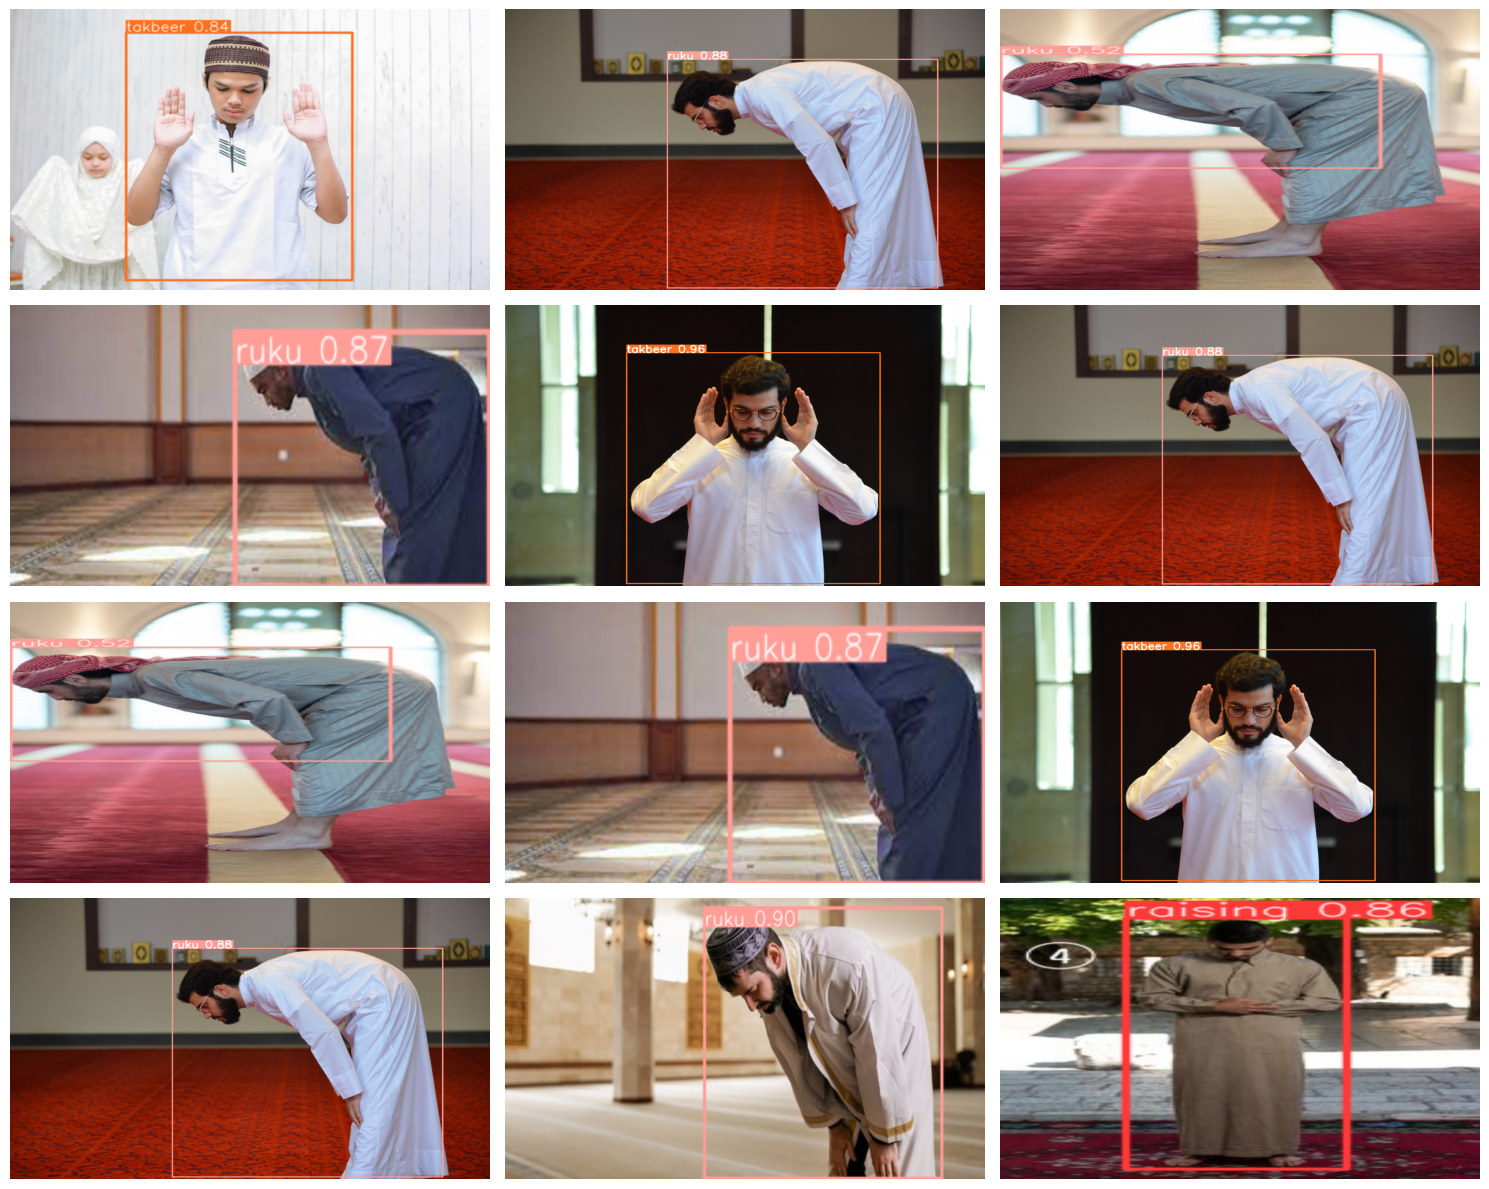

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import io

# Set the number of rows and columns in the grid
num_rows = 4
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, url in enumerate(image_urls):
    if i >= num_rows * num_cols:
        break

    # Download the image from the URL
    response = requests.get(url)
    img = np.array(Image.open(io.BytesIO(response.content)))

    # Convert the image to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Pass the original image to the model
    res = model(img_rgb)

    # Plot the result
    res_plotted = res[0].plot()

    # Resize the result to a specific size
    resized_result = cv2.resize(res_plotted, (1000, 750))

    # Convert the result to RGB format
    resized_result_rgb = cv2.cvtColor(resized_result, cv2.COLOR_BGR2RGB)

    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols

    # Display the image in the corresponding subplot with aspect='auto'
    axs[row_index, col_index].imshow(resized_result_rgb, aspect='auto')
    axs[row_index, col_index].axis('off')
plt.tight_layout()
plt.show()

## Faster R-CNN Model Testing
- **Testing Model on Test Dataset**

In [ ]:
!python eval.py --model fasterrcnn_resnet50_fpn_v2 --weights outputs/training/HunderedEpochs2722ImagesThreeClasses/best_model.pth --data data_configs/SalatPosturesPascalVoc2722.yaml --batch 16

2024-04-21 20:05:51.337386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 20:05:51.337439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 20:05:51.338828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 20:05:52.381749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 203/203 [00:00<00:00, 256227.42it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max numbe

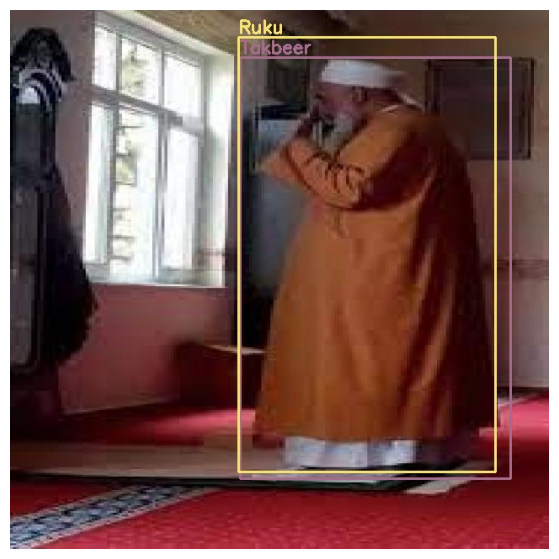

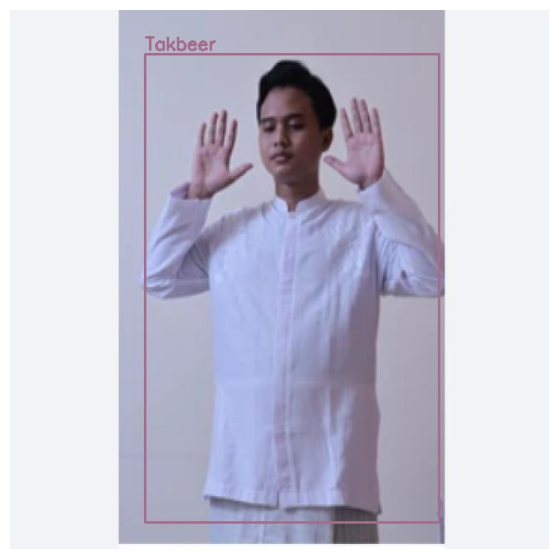

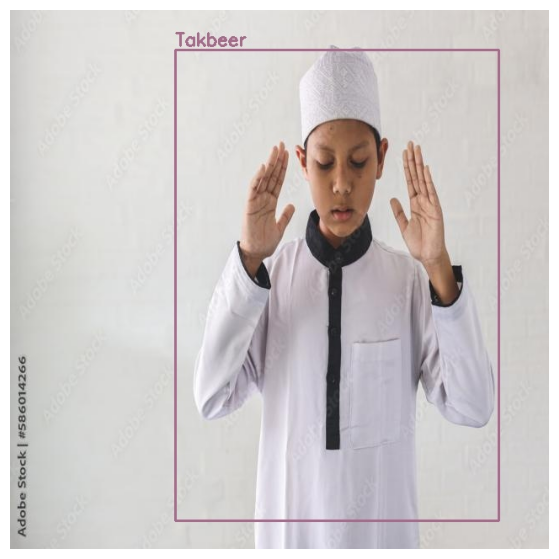

In [ ]:
# {Visualize Any Two Photos of Training}
results_dir_path = '/content/drive/MyDrive/Colab Notebooks/SalatPostures/Faster R-CNN/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()